# Lance Corton

## Research question/interests

Briefly describe your research question or interests her 

How do pro esports competitions streamed on media sites such as Twitch affect the peak average player base in a game like CSGO?

## EDA

#### Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import datetime
from project_functions3 import load_csgo

#### Exploratory Data Analysis
##### Understanding the variables

##### Steam Charts

In [147]:
df_charts = pd.read_csv('../data/raw/Steamcharts.csv', encoding='latin')
df_game = pd.read_csv('../data/raw/Twitch_game_data.csv', encoding='latin')
df_global = pd.read_csv('../data/raw/Twitch_global_data.csv', encoding='latin')

df_charts.head()

steam charts has: (83789, 7)
Index(['gamename', 'year', 'month', 'avg', 'gain', 'peak', 'avg_peak_perc'], dtype='object')
gamename          1260
year                10
month               12
avg              53471
gain             37276
peak             12748
avg_peak_perc    71491
dtype: int64
               year           avg           gain          peak
count  83789.000000  8.378900e+04   82529.000000  8.378900e+04
mean    2017.338708  2.792017e+03     -10.245559  5.518877e+03
std        2.237587  2.648480e+04    3789.944005  5.015571e+04
min     2012.000000  0.000000e+00 -250248.990000  0.000000e+00
25%     2016.000000  5.325000e+01     -38.310000  1.380000e+02
50%     2018.000000  2.042700e+02      -1.630000  5.020000e+02
75%     2019.000000  7.716500e+02      22.320000  1.741000e+03
max     2021.000000  1.584887e+06  426446.120000  3.236027e+06
['Counter-Strike: Global Offensive' 'Dota 2'
 "PLAYERUNKNOWN'S BATTLEGROUNDS" ... 'Axiom Verge' 'Plug & Play'
 'Steel Division: Normandy 

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [230]:
print(f'''steam charts has: {df_charts.shape}
{df_charts.columns}''')

steam charts has: (83789, 7)
Index(['gamename', 'year', 'month', 'avg', 'gain', 'peak', 'avg_peak_perc'], dtype='object')


In [231]:
print(df_charts.dtypes)

gamename          object
year               int64
month             object
avg              float64
gain             float64
peak               int64
avg_peak_perc     object
dtype: object


In [233]:
print(df_charts.nunique(axis =0))

gamename          1260
year                10
month               12
avg              53471
gain             37276
peak             12748
avg_peak_perc    71491
dtype: int64


In [234]:
print(df_charts.gamename.unique())

['Counter-Strike: Global Offensive' 'Dota 2'
 "PLAYERUNKNOWN'S BATTLEGROUNDS" ... 'Axiom Verge' 'Plug & Play'
 'Steel Division: Normandy 44']


In [235]:
print(df_charts.describe())

               year           avg           gain          peak
count  83789.000000  8.378900e+04   82529.000000  8.378900e+04
mean    2017.338708  2.792017e+03     -10.245559  5.518877e+03
std        2.237587  2.648480e+04    3789.944005  5.015571e+04
min     2012.000000  0.000000e+00 -250248.990000  0.000000e+00
25%     2016.000000  5.325000e+01     -38.310000  1.380000e+02
50%     2018.000000  2.042700e+02      -1.630000  5.020000e+02
75%     2019.000000  7.716500e+02      22.320000  1.741000e+03
max     2021.000000  1.584887e+06  426446.120000  3.236027e+06


##### Twitch Games

In [253]:
df_game.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [237]:
print(f'''twitch games has: {df_game.shape}
{df_game.columns}''')
print(df_game.nunique(axis =0))
print(df_game.describe())
print(df_game.Game.unique())
print(df_game.dtypes)

twitch games has: (13400, 12)
Index(['Rank', 'Game', 'Month', 'Year', 'Hours_watched', 'Hours_Streamed',
       'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers',
       'Avg_channels', 'Avg_viewer_ratio'],
      dtype='object')
Rank                  200
Game                 1692
Month                  12
Year                    6
Hours_watched       13361
Hours_Streamed      12443
Peak_viewers        12027
Peak_channels        2012
Streamers            8873
Avg_viewers          5328
Avg_channels         1278
Avg_viewer_ratio     7209
dtype: int64
              Rank         Month          Year  Hours_watched  Peak_viewers  \
count  13400.00000  13400.000000  13400.000000   1.340000e+04  1.340000e+04   
mean     100.50000      6.238806   2018.313433   4.492832e+06  5.174642e+04   
std       57.73646      3.416897      1.622744   1.589842e+07  1.226974e+05   
min        1.00000      1.000000   2016.000000   8.981100e+04  4.410000e+02   
25%       50.75000      3.000000   2017.0

##### Twitch Global Data

In [65]:
print(f'''twitch global data has: {df_global.shape}
{df_global.columns}''')
print(df_global.nunique(axis =0))
print(df_global.describe())
df_global.head()

twitch global data has: (67, 8)
Index(['year', 'Month', 'Hours_watched', 'Avg_viewers', 'Peak_viewers',
       'Streams', 'Avg_channels', 'Games_streamed'],
      dtype='object')
year               6
Month             12
Hours_watched     65
Avg_viewers       65
Peak_viewers      65
Streams           65
Avg_channels      65
Games_streamed    65
dtype: int64
              year      Month  Hours_watched   Avg_viewers  Peak_viewers  \
count    67.000000  67.000000   6.700000e+01  6.700000e+01  6.700000e+01   
mean   2018.313433   6.238806   9.777371e+08  1.339441e+06  2.818637e+06   
std       1.634931   3.442557   5.550636e+08  7.584625e+05  1.473737e+06   
min    2016.000000   1.000000   3.628332e+08  5.046350e+05  1.186009e+06   
25%    2017.000000   3.000000   5.305208e+08  7.392360e+05  1.724957e+06   
50%    2018.000000   6.000000   8.527248e+08  1.147678e+06  2.399946e+06   
75%    2020.000000   9.000000   1.114190e+09  1.526196e+06  3.679298e+06   
max    2021.000000  12.000000   

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149"
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134"
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234"
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282"
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424"


## Data Analysis Pipeline

#### Load Data

In [4]:
df_charts = pd.read_csv('../data/raw/Steamcharts.csv', encoding='latin')
df_game = pd.read_csv('../data/raw/Twitch_game_data.csv', encoding='latin')
df_global = pd.read_csv('../data/raw/Twitch_global_data.csv', encoding='latin')
df_csgo = df_charts.loc[df_charts['gamename'].str.startswith("Counter-Strike: Global Offensive")]

In [241]:
df_csgo

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%
...,...,...,...,...,...,...,...
99,Counter-Strike: Global Offensive,2012,November,14134.10,3394.62,50533,27.97%
100,Counter-Strike: Global Offensive,2012,October,10739.48,-5261.27,20850,51.5083%
101,Counter-Strike: Global Offensive,2012,September,16000.75,525.36,36057,44.3763%
102,Counter-Strike: Global Offensive,2012,August,15475.39,14542.81,52261,29.6117%


#### Clean Data

In [5]:
df_csgo_drop = df_csgo.dropna()
df_csgo_drop = df_csgo_drop.drop(['gamename','peak','avg_peak_perc'], axis = 1)
df_csgo_drop = df_csgo_drop.rename(columns={"year":"Year","month":"Month","avg":"Avg_players","gain":"Gain_players"})
df_csgo_drop = df_csgo_drop.replace(['January ','February ','March ','April ','May ','June ','July ','August ','September ','October ','November ','December '],['1','2','3','4','5','6','7','8','9','10','11','12'])
df_csgo_drop['Month'] = df_csgo_drop['Month'].astype('int64')
df_csgo_drop

,Year,Month,Avg_players,Gain_players
0,2021,2,741013.24,-2196.42
1,2021,1,743209.66,25405.91
2,2020,12,717803.75,49049.17
3,2020,11,668754.58,55087.89
4,2020,10,613666.69,6816.37
...,...,...,...,...
98,2012,12,14079.39,-54.71
99,2012,11,14134.10,3394.62
100,2012,10,10739.48,-5261.27
101,2012,9,16000.75,525.36


In [6]:
df_twitch_csgo = df_game.dropna()
df_twitch_csgo = df_twitch_csgo.loc[df_twitch_csgo['Game'].str.startswith("Counter-Strike: Global Offensive")]
df_twitch_drop = df_twitch_csgo.drop(['Rank','Game','Hours_watched','Hours_Streamed','Peak_channels','Streamers','Avg_channels','Avg_viewer_ratio'], axis = 1)

df_twitch_drop

,Month,Year,Peak_viewers,Avg_viewers
1,1,2016,372654,64378
201,2,2016,235027,64652
401,3,2016,784934,96854
601,4,2016,1059002,99754
803,5,2016,347527,60407
...,...,...,...,...
12407,3,2021,454393,97409
12607,4,2021,421485,97458
12807,5,2021,551182,101844
13008,6,2021,363798,76958


In [8]:
df_csgo_sort = pd.merge(df_twitch_drop, df_csgo_drop, how = "left", on = ["Month","Year"])
df_csgo_sort = df_csgo_sort.dropna()

In [9]:
# df_csgo_sort = df_csgo_sort.assign(Day= '1')
# df_csgo_sort = df_csgo_sort.convert_dtypes()
# df_csgo_sorted = df_csgo_sort.assign(Date = pd.to_datetime(df_csgo_sort['Year'].astype(str) + df_csgo_sort['Month'] + df_csgo_sort['Day'], format = '%Y%m%d'))
df_csgo_sort = df_csgo_sort.sort_values('Year')
df_csgo_sort
# df_csgo_sort.dtypes

,Month,Year,Peak_viewers,Avg_viewers,Avg_players,Gain_players
0,1,2016,372654,64378,365371.09,-12076.02
11,12,2016,240717,41152,342195.70,13150.44
10,11,2016,219844,45798,329045.26,-4031.20
9,10,2016,336075,47707,333076.46,10550.57
7,8,2016,152628,35333,347229.25,-6548.31
...,...,...,...,...,...,...
58,11,2020,551755,84442,668754.58,55087.89
52,5,2020,380494,103346,768795.25,-88808.97
59,12,2020,387473,81772,717803.75,49049.17
60,1,2021,592921,81964,743209.66,25405.91


## Method Chaining

In [10]:
print(load_csgo('../data/raw/Steamcharts.csv', '../data/raw/Twitch_game_data.csv'))

    Year  Month  Avg_players  Gain_players  Peak_viewers  Avg_viewers
61  2016      1    365371.09     -12076.02      372654.0      64378.0
50  2016     12    342195.70      13150.44      240717.0      41152.0
51  2016     11    329045.26      -4031.20      219844.0      45798.0
52  2016     10    333076.46      10550.57      336075.0      47707.0
53  2016      9    322525.89     -24703.36      305793.0      42783.0
..   ...    ...          ...           ...           ...          ...
12  2020      2    543979.15      42783.15      614792.0      71649.0
13  2020      1    501196.00      44494.44      257488.0      45616.0
7   2020      7    625900.81     -45746.65      197934.0      56396.0
1   2021      1    743209.66      25405.91      592921.0      81964.0
0   2021      2    741013.24      -2196.42      607485.0     100713.0

[62 rows x 6 columns]


In [11]:
df_csgo = load_csgo('../data/raw/Steamcharts.csv', '../data/raw/Twitch_game_data.csv')
df_csgo

,Year,Month,Avg_players,Gain_players,Peak_viewers,Avg_viewers
61,2016,1,365371.09,-12076.02,372654.0,64378.0
50,2016,12,342195.70,13150.44,240717.0,41152.0
51,2016,11,329045.26,-4031.20,219844.0,45798.0
52,2016,10,333076.46,10550.57,336075.0,47707.0
53,2016,9,322525.89,-24703.36,305793.0,42783.0
...,...,...,...,...,...,...
12,2020,2,543979.15,42783.15,614792.0,71649.0
13,2020,1,501196.00,44494.44,257488.0,45616.0
7,2020,7,625900.81,-45746.65,197934.0,56396.0
1,2021,1,743209.66,25405.91,592921.0,81964.0


In [8]:
print(df_csgo.shape)

(62, 6)


In [10]:
print(df_csgo.dtypes)

Year              int64
Month             int64
Avg_players     float64
Gain_players    float64
Peak_viewers    float64
Avg_viewers     float64
dtype: object


In [12]:
df_csgo.columns

Index(['Year', 'Month', 'Avg_players', 'Gain_players', 'Peak_viewers',
       'Avg_viewers'],
      dtype='object')

In [15]:
print(df_csgo.nunique(axis=0))

Year             6
Month           12
Avg_players     62
Gain_players    62
Peak_viewers    62
Avg_viewers     62
dtype: int64


In [17]:
df_csgo.describe()

,Year,Month,Avg_players,Gain_players,Peak_viewers,Avg_viewers
count,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000
mean,2018.096774,6.338710,429661.349516,5863.969839,4.389151e+05,58686.935484
std,1.500925,3.538748,142260.517169,42505.005607,2.552608e+05,24348.715673
min,2016.000000,1.000000,262170.880000,-97147.790000,1.526280e+05,25068.000000
25%,2017.000000,3.000000,341944.870000,-14742.950000,2.586422e+05,38018.750000
50%,2018.000000,6.000000,378507.995000,3803.550000,3.480280e+05,52658.000000
75%,2019.000000,9.000000,423334.932500,19320.175000,5.329642e+05,73847.250000
max,2021.000000,12.000000,857604.220000,186570.940000,1.298358e+06,120546.000000


## Visualization

In [16]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
plt.rc("axes.spines", top=False, right=False)
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


<AxesSubplot:xlabel='Month', ylabel='Avg_players'>

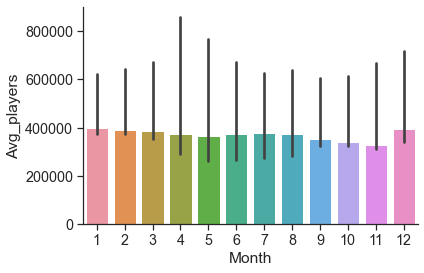

In [23]:
sns.barplot(x = 'Month', y = 'Avg_players', data = df_csgo, estimator=np.median)